In [1]:
import numpy as np
import pandas as pd
import queue
import matplotlib.pyplot as plt

from Backtest.backtest import Backtest
from Backtest.data import OHLCDataHandler
from ADXStrategy import ADXStrategy
from Backtest.open_json_gz_files import open_json_gz_files
from Backtest.generate_bars import generate_bars

In [2]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import hyperopt.pyll.stochastic

In [3]:
def run_backtest(config, trading_data, ohlc_data, window):
    window = int(window)
    config['title'] = "ADXStrategy" + "_" + str(window)
    print("---------------------------------")
    print(config['title'])
    print("---------------------------------")

    events_queue = queue.Queue()

    data_handler = OHLCDataHandler(
        config, events_queue,
        trading_data=trading_data, ohlc_data=ohlc_data
    )
    strategy = ADXStrategy(config, events_queue, data_handler,
                           window=window)

    backtest = Backtest(config, events_queue, strategy,
                        data_handler=data_handler)

    results = backtest.start_trading()

    # dict_ans = {
    #     "window": window,
    #     "Sharpe Ratio": [results['sharpe']],
    #     "Total Returns": [(results['cum_returns'][-1] - 1)],
    #     "Max Drawdown": [(results["max_drawdown"] * 100.0)],
    #     "Max Drawdown Duration": [(results['max_drawdown_duration'])],
    #     "Trades": [results['trade_info']['trading_num']],
    #     "Trade Winning": [results['trade_info']['win_pct']],
    #     "Average Trade": [results['trade_info']['avg_trd_pct']],
    #     "Average Win": [results['trade_info']['avg_win_pct']],
    #     "Average Loss": [results['trade_info']['avg_loss_pct']],
    #     "Best Trade": [results['trade_info']['max_win_pct']],
    #     "Worst Trade": [results['trade_info']['max_loss_pct']],
    #     "Worst Trade Date": [results['trade_info']['max_loss_dt']],
    #     "Avg Days in Trade": [results['trade_info']['avg_dit']]
    # }
    # return pd.DataFrame(dict_ans)
    return -1 * (results['cum_returns'][-1] - 1)

In [4]:
def f(params):
#     config = params['config']
#     ohlc_data = params['ohlc_data']
#     trading_data = params['trading_data']
    config = {
        "csv_dir": "C:/backtest/Binance",
        "out_dir": "C:/backtest/results/ADXStrategy",
        "title": "ADXStrategy",
        "is_plot": False,
        "save_plot": False,
        "save_tradelog": False,
        "start_date": pd.Timestamp("2017-07-01T00:0:00", freq="60" + "T"),  # str(freq) + "T"
        "end_date": pd.Timestamp("2018-09-01T00:00:00", freq="60" + "T"),
        "equity": 1.0,
        "freq": 60,  # min
        "commission_ratio": 0.001,
        "suggested_quantity": None,  # None or a value
        "max_quantity": None,  # None or a value, Maximum purchase quantity
        "min_quantity": None,  # None or a value, Minimum purchase quantity
        "min_handheld_cash": None,  # None or a value, Minimum handheld funds
        "exchange": "Binance",
        "tickers": ['BTCUSDT']
    }
    # trading_data = {}
    # for ticker in config['tickers']:
    #     # trading_data[ticker] = open_gz_files(config['csv_dir'], ticker)
    #     trading_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker + '.h5', key=ticker)

    ohlc_data = {}
    for ticker in config['tickers']:
        # ohlc_data[ticker] = generate_bars(trading_data, ticker, config['freq'])
        ohlc_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker + '_OHLC_60min.h5', key=ticker)

    trading_data = None
    
    window = params['window']
    val = run_backtest(config, trading_data, ohlc_data, window)
    return {'loss': val, 'status': STATUS_OK}

In [5]:
config = {
    "csv_dir": "C:/backtest/Binance",
    "out_dir": "C:/backtest/results/ADXStrategy",
    "title": "ADXStrategy",
    "is_plot": False,
    "save_plot": False,
    "save_tradelog": False,
    "start_date": pd.Timestamp("2017-07-01T00:0:00", freq="60" + "T"),  # str(freq) + "T"
    "end_date": pd.Timestamp("2018-09-01T00:00:00", freq="60" + "T"),
    "equity": 1.0,
    "freq": 60,  # min
    "commission_ratio": 0.001,
    "suggested_quantity": None,  # None or a value
    "max_quantity": None,  # None or a value, Maximum purchase quantity
    "min_quantity": None,  # None or a value, Minimum purchase quantity
    "min_handheld_cash": None,  # None or a value, Minimum handheld funds
    "exchange": "Binance",
    "tickers": ['BTCUSDT']
}

In [59]:
# trading_data = {}
# for ticker in config['tickers']:
#     # trading_data[ticker] = open_gz_files(config['csv_dir'], ticker)
#     trading_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker + '.h5', key=ticker)

ohlc_data = {}
for ticker in config['tickers']:
    # ohlc_data[ticker] = generate_bars(trading_data, ticker, config['freq'])
    ohlc_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker + '_OHLC_60min.h5', key=ticker)

trading_data = None

In [60]:
space = {
#     'config': hp.choice('config', [config]),
#     'ohlc_data': hp.choice('ohlc_data', [ohlc_data]),
#     'trading_data': hp.choice('trading_data', [trading_data]),
    'window': hp.randint('window', 240)
}

In [61]:
# print(hyperopt.pyll.stochastic.sample(space))

In [63]:
trials = Trials()

In [64]:
best = fmin(fn=f, space=space, algo=tpe.suggest, max_evals=60, trials=trials)

---------------------------------
ADXStrategy_89
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-08-07 23:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.7716055963
Max Drawdown: 51.5469295793
Max Drawdown Duration: 5830
Total Returns: 0.2570810070
---------------------------------
Trades: 110
Trade Winning: 40%
Average Trade: 0.53%
Average Win: 4.18%
Average Loss: -1.90%
Best Trade: 26.50%
Worst Trade: -9.56%
Worst Trade Date: 0 days 12:00:00
Avg Days in Trade: 1 days 02:04:55
---------------------------------
---------------------------------
ADXStrategy_157
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-08-07 23:00:00
---------------------------------
Running Backtest...
-----------------------------

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.7717407453
Max Drawdown: 52.6105148716
Max Drawdown Duration: 5830
Total Returns: 0.2547840765
---------------------------------
Trades: 101
Trade Winning: 40%
Average Trade: 0.57%
Average Win: 4.46%
Average Loss: -1.98%
Best Trade: 30.06%
Worst Trade: -8.64%
Worst Trade Date: 1 days 00:00:00
Avg Days in Trade: 1 days 04:20:48
---------------------------------
---------------------------------
ADXStrategy_152
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-08-07 23:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.4516292265
Max Drawdown: 49.0894014482
Max Drawdown Duration: 5830
Total Returns: 0.0735382703
---------------------------------
Trades: 83
Trade Winning: 35%
Av

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.1877021082
Max Drawdown: 33.2505378194
Max Drawdown Duration: 5830
Total Returns: 0.5206570910
---------------------------------
Trades: 81
Trade Winning: 38%
Average Trade: 0.89%
Average Win: 5.10%
Average Loss: -1.72%
Best Trade: 30.54%
Worst Trade: -9.73%
Worst Trade Date: 0 days 09:00:00
Avg Days in Trade: 1 days 09:10:22
---------------------------------
---------------------------------
ADXStrategy_68
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-08-07 23:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.4264329934
Max Drawdown: 41.7933314453
Max Drawdown Duration: 5830
Total Returns: 0.8129727390
---------------------------------
Trades: 128
Trade Winning: 37%
Ave

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.9863003930
Max Drawdown: 39.1718726485
Max Drawdown Duration: 5830
Total Returns: 0.4131753643
---------------------------------
Trades: 145
Trade Winning: 37%
Average Trade: 0.55%
Average Win: 4.24%
Average Loss: -1.64%
Best Trade: 23.37%
Worst Trade: -9.40%
Worst Trade Date: 1 days 12:00:00
Avg Days in Trade: 0 days 20:45:56
---------------------------------
---------------------------------
ADXStrategy_21
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-08-07 23:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.5715412195
Max Drawdown: 44.0459039139
Max Drawdown Duration: 3858
Total Returns: 0.9908953916
---------------------------------
Trades: 234
Trade Winning: 42%
Av

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.6488930882
Max Drawdown: 34.2953464468
Max Drawdown Duration: 5830
Total Returns: 1.0160987241
---------------------------------
Trades: 119
Trade Winning: 38%
Average Trade: 0.92%
Average Win: 4.89%
Average Loss: -1.49%
Best Trade: 27.64%
Worst Trade: -9.62%
Worst Trade Date: 1 days 17:00:00
Avg Days in Trade: 1 days 00:38:49
---------------------------------
---------------------------------
ADXStrategy_138
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-08-07 23:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.6548398811
Max Drawdown: 59.6558552739
Max Drawdown Duration: 5830
Total Returns: 0.1840274616
---------------------------------
Trades: 81
Trade Winning: 28%
Av

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.0249888656
Max Drawdown: 37.9563369255
Max Drawdown Duration: 5830
Total Returns: 0.4139945167
---------------------------------
Trades: 80
Trade Winning: 35%
Average Trade: 0.80%
Average Win: 5.50%
Average Loss: -1.72%
Best Trade: 31.95%
Worst Trade: -9.73%
Worst Trade Date: 0 days 09:00:00
Avg Days in Trade: 1 days 09:35:15
---------------------------------


In [65]:
best

{'window': 70}

In [13]:
trials()

TypeError: 'Trials' object is not callable

In [66]:
for trial in trials.trials:
    print(trial['misc']['vals'])

{'window': [89]}
{'window': [157]}
{'window': [164]}
{'window': [104]}
{'window': [209]}
{'window': [59]}
{'window': [46]}
{'window': [45]}
{'window': [56]}
{'window': [56]}
{'window': [220]}
{'window': [109]}
{'window': [152]}
{'window': [29]}
{'window': [222]}
{'window': [226]}
{'window': [92]}
{'window': [203]}
{'window': [125]}
{'window': [134]}
{'window': [25]}
{'window': [76]}
{'window': [164]}
{'window': [162]}
{'window': [68]}
{'window': [239]}
{'window': [80]}
{'window': [101]}
{'window': [218]}
{'window': [63]}
{'window': [68]}
{'window': [51]}
{'window': [87]}
{'window': [107]}
{'window': [186]}
{'window': [53]}
{'window': [21]}
{'window': [32]}
{'window': [173]}
{'window': [21]}
{'window': [21]}
{'window': [197]}
{'window': [183]}
{'window': [30]}
{'window': [67]}
{'window': [217]}
{'window': [113]}
{'window': [70]}
{'window': [138]}
{'window': [55]}
{'window': [70]}
{'window': [70]}
{'window': [62]}
{'window': [70]}
{'window': [234]}
{'window': [81]}
{'window': [214]}
{'wi

Text(0,0.5,'$x$')

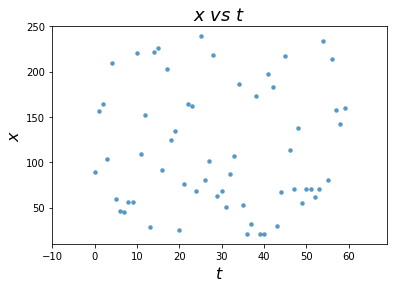

In [67]:
f, ax = plt.subplots(1)
xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['window'] for t in trials.trials]
ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$x$ $vs$ $t$ ', fontsize=18)
ax.set_xlabel('$t$', fontsize=16)
ax.set_ylabel('$x$', fontsize=16)

Text(0,0.5,'$val$')

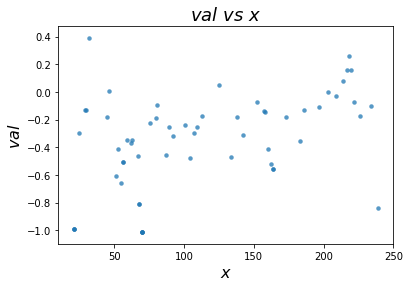

In [68]:
f, ax = plt.subplots(1)
xs = [t['misc']['vals']['window'] for t in trials.trials]
ys = [t['result']['loss'] for t in trials.trials]
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$val$ $vs$ $x$ ', fontsize=18)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$val$', fontsize=16)

In [25]:
from hyperopt.plotting import *

Showing Histogram of 35 jobs


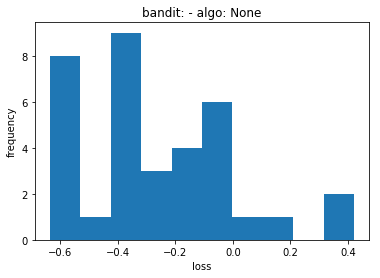

In [27]:
main_plot_histogram(trials)

In [28]:
main_plot_vars(trials)

finite loss range -0.635309038864539 0.4210990305803458 -1.635309038864539


AttributeError: 'NoneType' object has no attribute 'params'

In [31]:

from hyperopt.tests.test_domains import many_dists

In [33]:
domain = many_dists()

In [34]:
domain.expr

In [35]:
from hyperopt import base

In [36]:
domain = base.Domain(f, space)

finite loss range -0.635309038864539 0.4210990305803458 -1.635309038864539


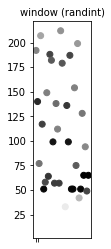

In [37]:
main_plot_vars(trials, bandit=domain)